In [1]:
import os
import re
import json
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from math import log10
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [4]:
train_dir = os.path.realpath("./assets/annotated-corpus/train")
result_dir = os.path.realpath("./assets/wordcount/train")

In [5]:
topics = os.listdir(train_dir)
topics

['1', '4', '3', '2']

# Task 1

In [6]:
def get_stems_processed(filepath):
    sentences = []
    pattern = r"([A-Za-z]+[-.@]?)+\w*\.?"
    with open(filepath) as f:
        lines = "".join(f.readlines())
        sentences_raw = lines.split("\n\n")
        for s in sentences_raw:
            stems = []
            words = s.split("\n")
            if len(words) == 0 or words[0] == "":
                continue
            stems_raw = list(map(lambda x: x.split("\t")[1], words))
            lemmas = list(map(lambda x: x.split("\t")[2], words))
            for i in range(len(stems_raw)):
                if lemmas[i] not in stopwords.words("english") and re.match(pattern, lemmas[i]) is not None:
                    stems.append(stems_raw[i])
            sentences.append(stems)
    return sentences

In [7]:
def count_words_in_sentences(sentences):
    word_count = {}
    sentences_count = []
    for sentence in sentences:
        wbs_count = {}
        for w in sentence:
            if w not in wbs_count.keys():
                wbs_count[w] = 0
            wbs_count[w] += 1
            if w not in word_count.keys():
                word_count[w] = 0
            word_count[w] += 1
        sentences_count.append(wbs_count)
    return sentences_count

In [8]:
import datetime

all_documents = []
word_dict_raw = {}
cntr = 0
total_len = 0
for t in topics:
    total_len += len(os.listdir(os.path.join(train_dir, t)))
print(f"Total files for process: {total_len}")

for t in topics:
    workdir = os.path.join(train_dir, t)
    start_time = datetime.datetime.now()
    for filename in os.listdir(workdir):
        stems = get_stems_processed(os.path.join(workdir, filename))
        all_documents.append(stems)
        counts = count_words_in_sentences(stems)
        for w in counts.keys():
            if w not in word_dict_raw.keys():
                word_dict_raw[w] = 0
            word_dict_raw[w] += counts[w]
        cntr += 1
        if cntr % 1000 == 0:
            print(f"Processed {cntr} files. 1000 files per: {(datetime.datetime.now() - start_time).total_seconds()}s")
            start_time = datetime.datetime.now()

Total files for process: 120000
Processed 1000 files. 1000 files per: 2.285611s
Processed 2000 files. 1000 files per: 2.145206s
Processed 3000 files. 1000 files per: 2.162677s
Processed 4000 files. 1000 files per: 2.154292s
Processed 5000 files. 1000 files per: 2.17095s
Processed 6000 files. 1000 files per: 2.165514s
Processed 7000 files. 1000 files per: 2.105886s
Processed 8000 files. 1000 files per: 2.132039s
Processed 9000 files. 1000 files per: 2.179763s
Processed 10000 files. 1000 files per: 2.130145s
Processed 11000 files. 1000 files per: 2.075643s
Processed 12000 files. 1000 files per: 2.142477s
Processed 13000 files. 1000 files per: 2.116347s
Processed 14000 files. 1000 files per: 2.096928s
Processed 15000 files. 1000 files per: 2.214315s
Processed 16000 files. 1000 files per: 2.367267s
Processed 17000 files. 1000 files per: 2.637775s
Processed 18000 files. 1000 files per: 2.347544s
Processed 19000 files. 1000 files per: 2.251855s
Processed 20000 files. 1000 files per: 2.305264

In [9]:
word_dict = dict(word_dict_raw)

for w in word_dict_raw.keys():
    if word_dict_raw[w] < 3:
        del word_dict[w]

In [10]:
if not os.path.isdir(result_dir):
    os.makedirs(result_dir, exist_ok=True)
with open(os.path.join(result_dir, "dictionary.json"), "w") as f:
    json.dump(word_dict, f, indent=1)

In [191]:
doc_names = []
matrix_arr = []
cnt = 0
for t in topics:
    workdir = os.path.join(train_dir, t)
    start_time = datetime.datetime.now()
    for filename in os.listdir(workdir):
        doc_names.append(t + "/" + filename)
        stems = get_stems_processed(os.path.join(workdir, filename))
        counts = count_words_in_sentences(stems)
        vec = []
        for w in word_dict.keys():
            if w in counts.keys():
                vec.append(counts[w])
            else:
                vec.append(0)
        matrix_arr.append(vec)
        if sum(vec) == 0:
            print("Zero vector for document", filename)
        cnt += 1
        if cnt % 1000 == 0:
            print(f"Processed {cnt} files. 1000 Files Per: {(datetime.datetime.now() - start_time).total_seconds()}s")
            start_time = datetime.datetime.now()


Processed 1000 files. 1000 Files Per: 12.160512s
Processed 2000 files. 1000 Files Per: 12.18704s
Processed 3000 files. 1000 Files Per: 16.435404s
Processed 4000 files. 1000 Files Per: 14.748235s
Processed 5000 files. 1000 Files Per: 14.950337s
Processed 6000 files. 1000 Files Per: 18.305409s
Processed 7000 files. 1000 Files Per: 14.43797s
Processed 8000 files. 1000 Files Per: 14.86086s
Processed 9000 files. 1000 Files Per: 15.588874s
Processed 10000 files. 1000 Files Per: 14.100073s
Processed 11000 files. 1000 Files Per: 13.400248s
Processed 12000 files. 1000 Files Per: 15.122078s
Processed 13000 files. 1000 Files Per: 14.088672s
Processed 14000 files. 1000 Files Per: 14.276741s
Processed 15000 files. 1000 Files Per: 16.00925s
Processed 16000 files. 1000 Files Per: 15.271889s
Processed 17000 files. 1000 Files Per: 18.820368s
Processed 18000 files. 1000 Files Per: 20.164487s
Processed 19000 files. 1000 Files Per: 19.473286s
Processed 20000 files. 1000 Files Per: 17.522625s
Processed 210

In [211]:
m_len = len(matrix_arr)
m_1 = pd.DataFrame(matrix_arr[:int(m_len/4)])
m_1.columns = word_dict.keys()
m_1.index = doc_names[:int(m_len/4)]

KeyboardInterrupt: 

In [ ]:
m_1.to_csv(os.path.join(result_dir, "term-document.csv"))

In [214]:
m_len = len(matrix_arr)
m_1 = pd.DataFrame(matrix_arr[int(3*m_len/4):])
m_1.columns = word_dict.keys()
m_1.index = doc_names[int(3*m_len/4):]
m_1.to_csv(os.path.join(result_dir, "term-document.csv"), mode="a", header=False)

In [202]:
matrix = pd.DataFrame(matrix_arr)
matrix.columns = word_dict.keys()
matrix.index = doc_names

MemoryError: Unable to allocate 5.56 GiB for an array with shape (120000, 6218) and data type object

In [ ]:
matrix.to_csv(os.path.join(result_dir, "term-document.csv"))

# Task 2

In [13]:
def tf_idf(words, matrix):
    total_words = sum(words.values())
    total_documents = len(matrix.index)
    result = []
    for w in matrix.columns:
        if w not in words:
            result.append(0.0)
            continue
        t_f = words[w] / total_words
        d_f = sum(matrix[w] > 0)
        tfidf = t_f * (log10(total_documents + 1) - log10(d_f + 1))
        result.append(tfidf)
    return result

In [15]:
import os
import re
from nltk import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from pathlib import Path

In [16]:
def split_to_words(sentence):
    words = re.findall(r"\w+@\w+\.\w+|\+\d{1,3}-\d{3}-\d{3}-\d{2}-\d{2}|\w+", sentence)
    return words

In [17]:
def split_to_sent(text):
    sentences = re.split(
        r"(((?<!\w\.\w.)(?<!\s\w\.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s(?=[A-Z]))|((?<![\,\-\:])\n(?=[A-Z]|\" )))", text)[
                ::4]
    return sentences

In [18]:
def preprocess_text(text, by_sentences=False):
    stemmer = SnowballStemmer("english")
    lemmatizer = WordNetLemmatizer()
    sentences = split_to_sent(text)
    result = []
    for s in sentences:
        sentence = []
        for w in split_to_words(s):
            w_processed = re.sub(r"[.!?,]$", "", w).lower()
            if lemmatizer.lemmatize(w_processed) not in stopwords.words("english"):
                sentence.append(stemmer.stem(w_processed))
        if by_sentences:
            result.append(sentence)
        else:
            result += sentence
    return result

In [73]:
def vectorize_tf_idf(text, matrix):
    prepr = preprocess_text(text)
    words_dict = count_words_in_sentences([prepr])
    return tf_idf(words_dict, matrix)

In [11]:
matrix = pd.read_csv(os.path.join(result_dir, "term-document.csv"), index_col=0)

In [69]:
t1 = """hello man. how are you?"""

In [21]:
t2 = """A 49th-minute header by Moroccan defender Talal El Karkouri gave Charlton Athletic a 1-0 home win over Blackburn Rovers on Monday that lifted the London club to seventh in the Premier League."""

In [76]:
vectorize_tf_idf(t1, matrix)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8894034001412627,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 

In [23]:
vectorize_tf_idf(t2, matrix)[:100]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.029751089129029136,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.025625816488124634,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02026599618583556,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

# Task 3

In [24]:
w2v = Word2Vec(sentences=[sentence for document in all_documents for sentence in document], epochs=40)
w2v.save(os.path.join(train_dir, "..", "w2v_weights"))

In [25]:
w2v.wv['iraq']

array([ 1.3753059 , -0.6527993 , -1.9933591 , -2.0335765 , -0.6259088 ,
        1.4006549 ,  0.7272369 ,  4.1035485 , -0.7597409 , -3.0505257 ,
       -2.4984121 ,  1.1466949 ,  0.30387217,  5.013219  , -2.5977163 ,
        1.5072976 , -3.197507  , -2.5066087 ,  2.0346072 , -1.5816548 ,
       -2.475255  , -0.01434773,  1.3589938 ,  2.3195596 , -1.072113  ,
       -0.6712122 ,  1.1802013 , -1.594049  ,  1.1249772 ,  6.6687636 ,
        0.74001   , -2.871656  ,  1.0062395 , -0.5834692 , -1.1148587 ,
        3.0799987 , -0.24160151,  1.6672803 , -0.83680964,  2.948808  ,
       -1.4980687 ,  0.39835992,  0.6045767 , -0.2361063 , -0.1972433 ,
       -1.4385386 ,  0.21345973, -0.72053087, -0.59032744, -2.732584  ,
        2.5335586 ,  3.5449407 , -1.5516536 , -0.03954422,  2.2842336 ,
       -0.09268351,  0.3129703 , -1.3752164 , -4.8495    ,  0.4668962 ,
       -3.0655065 , -1.3341545 ,  0.5979031 ,  4.632379  , -1.8854225 ,
       -0.42883158, -1.0701903 , -0.9730214 ,  3.3188572 , -0.74

In [31]:
w2v.wv.most_similar(positive=['iraq'], negative=['islam'])

[('iraqi', 0.3826082646846771),
 ('dolphin', 0.3820282220840454),
 ('jaguar', 0.3721027970314026),
 ('bengal', 0.364101767539978),
 ('convoy', 0.3619471490383148),
 ('navi', 0.35479336977005005),
 ('colt', 0.35157495737075806),
 ('kbr', 0.34732553362846375),
 ('panther', 0.33328235149383545),
 ('abraham', 0.3317876160144806)]

In [41]:
w2v.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.47129571437835693),
 ('throne', 0.44849470257759094),
 ('monarch', 0.442725270986557),
 ('grandson', 0.4017987847328186),
 ('pregnanc', 0.40053996443748474),
 ('norodom', 0.3867124319076538),
 ('oath', 0.3863121271133423),
 ('pm', 0.38038894534111023),
 ('father', 0.3740307688713074),
 ('sihanouk', 0.37397968769073486)]

In [26]:
w2v.wv.most_similar("iraq")

[('iraqi', 0.7915021181106567),
 ('afghanistan', 0.5826280117034912),
 ('baghdad', 0.5312554836273193),
 ('fallujah', 0.5252335071563721),
 ('lebanon', 0.5161750316619873),
 ('insurg', 0.506945788860321),
 ('afghan', 0.4784746766090393),
 ('countri', 0.477952241897583),
 ('sudan', 0.45074230432510376),
 ('falluja', 0.43584969639778137)]

# Task 4

In [27]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [92]:
cosine_similarity(w2v.wv["man"], w2v.wv["char"])

0.123242065

In [79]:
cosine_similarity(w2v.wv["man"], w2v.wv["man"])

1.0

In [35]:
def draw_words(terms, vectors_source):
    pca = PCA(n_components=2)
    vectors_2d = pd.DataFrame(pca.fit_transform([vectors_source[term] for term in terms]))
    vectors_2d.index = terms
    vectors_2d.columns = ["x", "y"]
    p = sns.scatterplot(data=vectors_2d, x="x", y="y")

    for i in vectors_2d.index:
        item = vectors_2d.loc[i]
        p.text(item.x, item.y, i)
    return p

<Axes: xlabel='x', ylabel='y'>

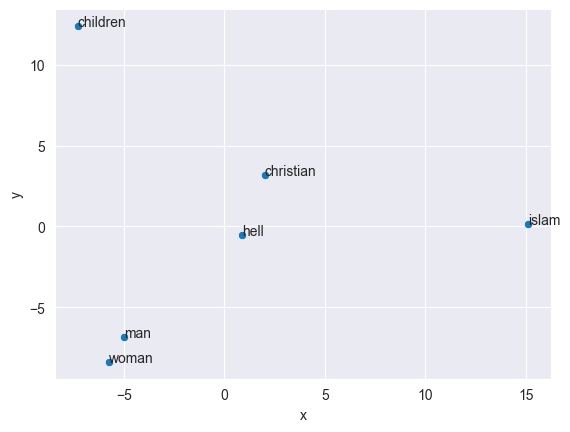

In [93]:
terms_to_check = ["christian", "islam", "hell", "woman", "man", "children"]
draw_words(terms_to_check, w2v.wv)

# Task 5

In [46]:
def transform_to_compare(vectors):
    pca = PCA(n_components=len(w2v.wv[0]))
    transformed = pca.fit_transform(vectors)
    return transformed

In [47]:
terms_vectorized = [vectorize_tf_idf(i, matrix) for i in matrix.columns]

# Task 6

In [48]:
to_cmp = transform_to_compare(terms_vectorized)

In [49]:
terms_to_compare = pd.DataFrame(to_cmp)
terms_to_compare.index = matrix.columns

In [50]:
def compare_methods(w1, w2):
    print("Results for words", w1, "and", w2)
    print("W2V:", cosine_similarity(w2v.wv[w1], w2v.wv[w2]))
    print("Tf-Idf:", cosine_similarity(terms_to_compare.loc[w1], terms_to_compare.loc[w2]))
    print()

In [96]:
compare_methods("christian", "hell")
compare_methods("man", "woman")

Results for words christian and hell
W2V: 0.08466728
Tf-Idf: 0.08411453500665875

Results for words man and woman
W2V: 0.5574322
Tf-Idf: 0.9969799265832958


In [59]:
tfidf_data = {}
for i in range(len(matrix.columns)):
    tfidf_data[matrix.columns[i]] = terms_vectorized[i]

<Axes: xlabel='x', ylabel='y'>

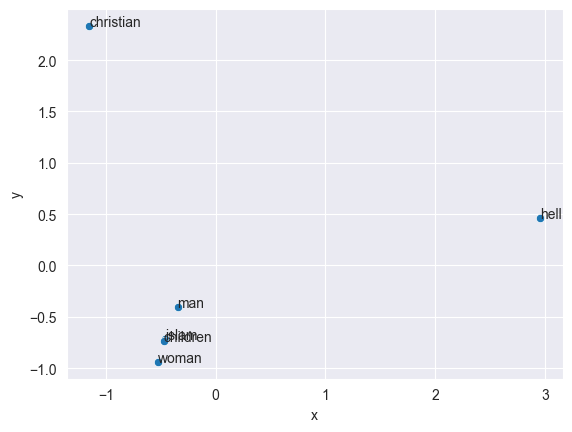

In [95]:
draw_words(terms_to_check, tfidf_data)

# Task 7

In [89]:
def vectorize(sentences, w2v):
    result_vec = np.zeros(w2v.vector_size)
    for s in sentences:
        sentence_vec = np.zeros(w2v.vector_size)
        for w in s:
            if w2v.wv.has_index_for(w):
                sentence_vec += w2v.wv[w]
        sentence_vec = sentence_vec / len(s) if len(s) > 0 else np.zeros(w2v.vector_size)
        result_vec += sentence_vec
    result_vec = result_vec / len(sentences) if len(sentences) > 0 else np.zeros(w2v.vector_size)
    return result_vec

In [85]:
preprocess_text(t1, True)

[['hello', 'man']]

In [90]:
vectorize(preprocess_text(t1, True), w2v)

array([ 0.41036576,  0.0120754 , -0.73560683,  0.15516603, -0.89255759,
        0.72401994, -0.61282992, -1.02715608, -0.3275778 ,  1.27961437,
       -0.10390796,  0.3083608 ,  1.42807415, -0.66750374,  0.6343964 ,
        0.02857009, -0.47411379, -1.19629455,  0.36741744,  0.94901628,
       -1.93093809,  0.61474094, -1.90837193,  0.94277811, -0.78394541,
       -0.67697105,  0.32502337, -0.25949792, -0.65992478, -1.1064032 ,
        0.45887651,  1.02905172,  0.3888519 , -0.93506735, -0.40615079,
        1.74659054,  0.28477636,  0.75097573, -1.51563501, -1.92576882,
        1.11761031, -1.16298844,  0.7076156 , -0.42858729, -0.28754063,
        0.45418458,  0.31663905, -0.06421575, -0.38559178, -0.31582488,
        0.48437441,  0.42708942, -0.00852862,  0.18740055, -0.31519018,
        0.10585723, -0.83216604,  0.0933819 ,  0.23987745, -2.04473825,
       -0.7638237 , -0.04131253, -1.63302606,  0.43548821, -0.26928098,
        0.24761065,  0.28277989,  0.66974451,  0.2234791 , -0.18

 # Task 8

In [37]:
w2v = Word2Vec.load(os.path.join(train_dir, ".", "w2v_weights"))
vectorized_documents = {}
for t in topics:
    workdir = os.path.join(train_dir, t)
    for filename in os.listdir(workdir):
        stems = get_stems_processed(os.path.join(workdir, filename))
        vectorized_documents[os.path.join(t, filename)] = vectorize(stems, w2v)

In [38]:
with open(os.path.join(train_dir, ".", "train_embeddings.tsv"), "w") as f:
    for k in vectorized_documents.keys():
        print(k.replace(".tsv", ""), *vectorized_documents[k], sep="\t", file=f)

In [40]:
test_dir = os.path.realpath("./assets/annotated-corpus/test")
vectorized_documents = {}
for t in topics:
    workdir = os.path.join(test_dir, t)
    for filename in os.listdir(workdir):
        stems = get_stems_processed(os.path.join(workdir, filename))
        vectorized_documents[os.path.join(t, filename)] = vectorize(stems, w2v)

In [41]:
with open(os.path.join(train_dir, ".", "test_embeddings.tsv"), "w") as f:
    for k in vectorized_documents.keys():
        print(k.replace(".tsv", ""), *vectorized_documents[k], sep="\t", file=f)